# 4 - Lacunas Estruturais

In [1]:
import netpixi
import graph_tool_extras as gte

## Motivação

Na rede abaixo, os vértices são famílias da elite da Florença no século XV e as arestas representam relações de casamento ou negócio [[1](#medici), [2](#duality)].

In [ ]:
netpixi.render('../../../Datasets/florentine-families-clean.net.gz');

Particularmente no tutorial de betweenness, vimos que algumas famílias eram *intermediadoras,* ou seja, necessárias para que uma informação chegasse de uma família a outra.

No entanto, o cálculo do betweenness é *global,* ou seja, considera toda a rede. Dependendo do contexto, esse cálculo pode ser inadequado, pois:

* em muitas redes, uma informação não anda mais do que um ou dois passos;

* nem sempre temos informação sobre toda a rede.

Este tutorial, em particular, busca responder à seguinte pergunta: *como estimar a intermediação de um vértice considerando apenas os vizinhos desse vértice?*

## Intuição

Na teoria de **lacunas estruturais** *(structural holes),* uma relação entre uma pessoa A e outra pessoa B é *redundante* para A se existe um terceira pessoa C tal que existe uma relação entre A e C e existe uma relação entre C e B. A ideia é que, como A tem acesso aos recursos de B *através* de C, não precisa manter uma relação com B.

Isso é relevante quando consideramos que manter uma relação exige, no mínimo, um investimento de tempo. Como não é possível manter *infinitas* relações, precisamos manter *boas* relações.

A partir dessas observações, vamos considerar a seguinte ideia: *calcular uma métrica que representa, ao mesmo tempo, muitas conexões e pouca redundância.*

## Definições

Dado um vértice $u$, seja $N(u)$ o conjunto de sucessores de $u$.

Dados dois vértices, $u$ e $w$, seja $p_{uw}$ o *investimento* que $u$ faz para manter a relação com $w$. Por simplicidade, vamos estabelecer que

$$p_{uw} = \frac{1}{\delta(u)},$$

onde $\delta(u)$ é o número de sucessores de $u$. Ou seja, quanto maior o número de relações, menor o investimento em cada uma.

A **restrição de Burt** *(Burt constraint)* de $u$ é dada por:

$$\sum_{v \in N(u)} \left(p_{uv} + \sum_{w \in N(u) \cap N(v)} p_{uw} p_{wv}\right)^2.$$

Ou seja, é um valor que *diminui* quando há muitas conexões e pouca redundância.

## Cálculo

Para calcular a restrição de Burt, podemos chamar a função `constraint`.

Essa função devolve uma propriedade de vértice. Podemos adicionar essa propriedade ao grafo passando ela como segundo parâmetro do método `add_vp`.

In [12]:
g = gte.load('movies_reposicionado3.net.gz')

c = gte.burt_constraint(g)
d = gte.total_degree(g)

g.add_vp('burt_constraint', c)

In [13]:
dicio = {"restricao": c, "degree": d}
import pandas as pd
df = pd.DataFrame(dicio)

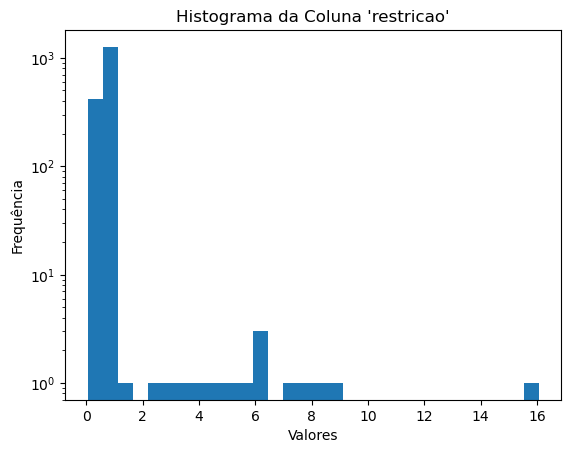

In [11]:
import matplotlib.pyplot as plt

plt.hist(df["restricao"], bins=30, log=True) # Aumente o número de bins
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma da Coluna 'restricao'")
plt.show()


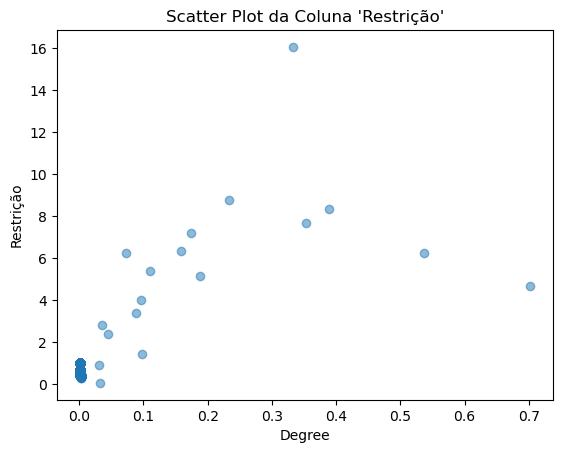

In [15]:
plt.scatter(df["degree"], df["restricao"], alpha=0.5)
plt.xlabel("Degree")
plt.ylabel("Restrição")
plt.title("Scatter Plot da Coluna 'Restrição'")
plt.show()


## Visualização

Lembre que, para visualizar a rede modificada, precisamos salvar ela em um novo arquivo.

In [3]:
gte.save(g, 'structural_holes.net.gz')

Como a rede não é muito grande, vamos desconsiderar o tutorial de visualização em larga escala e rodar uma segunda visualização.

In [ ]:
r = netpixi.render('structural_holes.net.gz')

Nessa visualização, podemos chamar o método `vertex_scale` para usar a restrição de Burt como tamanho dos vértices.

Esse método recebe três parâmetros: o primeiro é o nome da propriedade, o segundo é o tamanho mínimo e o terceiro é o tamanho máximo.

In [5]:
r.vertex_scale('burt_constraint', 10, 30)

## Referências

[<a name="medici">1</a>] J. F. Padgett e C. K. Ansell. *Robust action and the rise of the Medici, 1400-1434.* American Journal of Sociology, 98(6), 1993.

[<a name="duality">2</a>] R. L. Breiger e P. E. Pattison. *Cumulated social roles: the duality of persons and their algebras.* Social Networks, 8(3), 1986.

<div class="alert alert-block alert-info">
   <strong>DICA:</strong> Você pode clicar na aba
   
   à esquerda para navegar por seção.
</div>